# Using the LandscapeGenerator

This short example shows how to generate a scene. We start by making the generator, adding objects, generating the scene, and finally visualizing the scene. At the end we also see how the pixels are distributed in color space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import LandscapeGenerator as LG

In [3]:
np.random.seed(12345678)

In [4]:
#My formatting preferences
plt.rc("text", usetex=True)
plt.rc("font", size=18, family="serif")

In [5]:
#Setting up the field of view
aspect_ratio = 4./3 #ratio of columns to rows
M = 100 #number of rows of pixels
#N = int(aspect_ratio * M) #number of columns of pixels
field_of_view = np.zeros((2, 2))
field_of_view[0, 0:2] = -10, 25
#field_of_view[1, 1] = aspect_ratio * (field_of_view[0, 1] - field_of_view[0, 0])
field_of_view[1, 0:2] = 0, 360
M = 50
N = int(360./35) * M
dimensions = [M, N]
print("Field of view (degrees)")
print("Vertical direction:   ", field_of_view[0])
print("Horizontal direction: ", field_of_view[1])

Field of view (degrees)
Vertical direction:    [-10.  25.]
Horizontal direction:  [  0. 360.]


In [6]:
L = LG.LGenerator(dimensions, 
                  field_of_view=field_of_view)

In [7]:
#Add features to the landscape
L.clear_features() #Only need this line if you want to make a new landscape
L.add_feature(LG.SkyFeature(rgb_means = [20, 100, 200], rgb_SDs = [5, 5, 5]))
L.add_feature(LG.SkyFeature(theta_boundary = 10, rgb_means = [20, 80, 160], rgb_SDs = [5, 5, 5]))
L.add_feature(LG.SkyFeature(theta_boundary = 20, rgb_means = [5, 40, 120], rgb_SDs = [5, 5, 5]))
L.add_feature(LG.SkyFeature(theta_boundary = 30, rgb_means = [3, 20, 80], rgb_SDs = [5, 5, 5]))

L.add_feature(LG.GrassFeature(theta_boundary = 0))
L.add_feature(LG.GrassFeature(theta_boundary = -5, rgb_means=[50, 200, 70]))
#L.add_feature(LG.SunFeature(theta = 10*np.random.rand(), phi = field_of_view[1, 1] * np.random.rand()))
L.add_feature(LG.SunFeature(theta = 10*np.random.rand(), phi = 0))

L.add_feature(LG.SkyGradientFeature(rgb_peaks = [150, 0, 50]))

#Create tree features
#sort them by distance from the viewer
#add them to the landscape
trees = [LG.TreeFeature(height = 6 + 2*np.random.rand(), 
                        branch_radius = 1.5 + np.random.rand(),
                        distance = 6 + 40 * np.random.rand(),
                        phi = field_of_view[1, 1] * np.random.rand(), 
                        leaf_rgb_means = [80,160,110] + 20*np.random.randn(3),
                        trunk_rgb_means = [105,75,50] + 5*np.random.randn(3)) for _ in range(25)]
trees.sort(key = lambda x: x.distance, reverse=True)
for t in trees:
    L.add_feature(t)

In [8]:
#pic is M x N x 3, having rgb values in the last dimension
pic = L.generate()

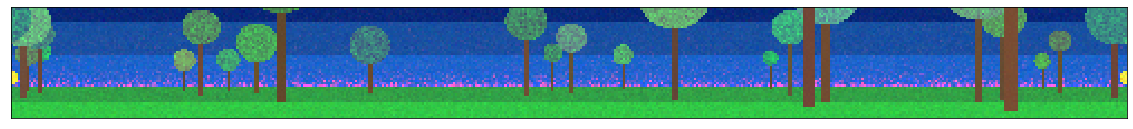

In [9]:
#Visualize
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.imshow(pic)
fig.savefig("./images/example_landscape.png", bbox_inches="tight")

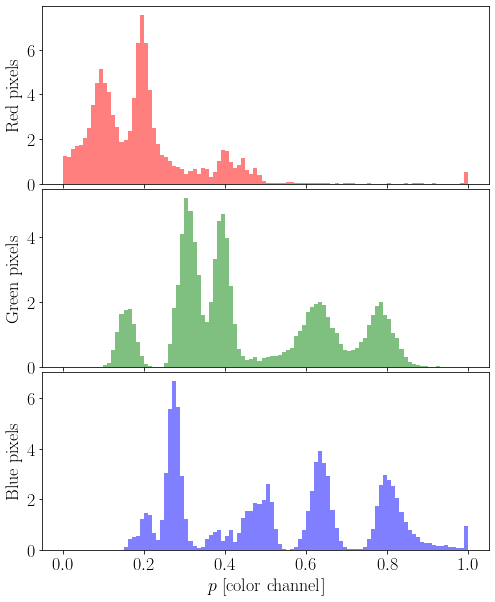

In [10]:
#Visualize the distribution of pixel values
#We see that the distributions follow our by-hand approach
fig, axes = plt.subplots(ncols=1, nrows=3, figsize = (8, 10), sharex=True)
plt.subplots_adjust(hspace=0.03)
_ = axes[0].hist(pic[:,:,0].flatten(), bins=100, range=[0,1], color='r', alpha=0.5, density=True)
_ = axes[1].hist(pic[:,:,1].flatten(), bins=100, range=[0,1], color='g', alpha=0.5, density=True)
_ = axes[2].hist(pic[:,:,2].flatten(), bins=100, range=[0,1], color='b', alpha=0.5, density=True)
axes[0].set_ylabel("Red pixels")
axes[1].set_ylabel("Green pixels")
axes[2].set_ylabel("Blue pixels")
axes[2].set_xlabel(r"$p\ [{\rm color\ channel}]\ $")
fig.savefig("./images/example_landscape_pixel_hist.png", bbox_inches="tight")